# **DSCI 100 Project:** *Are the "Chronically Online" More Likely to Subscribe?*

## Introduction
#### Background
This project and many others from fellow DSCI 100 students will be used to aide a UBC computer science research group led by Frank Wood with the goal of determining how people play video games. The team has set up a MineCraft server in hopes of logging players' actions in the game. What this project hopes to achieve is to help target recruitment for the research group.
#### Questions
*Broad Question:* What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

*Specific Question:* Are experience, number of sessions played, hours played, and age good predictors of subscription to a game-related newsletter? How do these variables differ between various player types (subscription status)?
#### Data Description
This project will use two sets of data that contain player identification and traits and their logged sessions. 

The first file is named "players.csv":
* CSV file, delimited by ",'.
* 196 observations (players)
* 7 variables
* Experience, subscription status, hashed E-mail, name, and gender are categorical.
* Hours played and age are quantitative.
* Experience is split into beginner, amatuer, regular, veteran and pro, but it is hard to know how these rank comparatively. I have ordered them into what I think is appropriate in terms of least to most experience based on naming.

The second file is named "sessions.csv":
* CSV file, delimited by ",".
* 1535 observations (sessions)
* 5 variables
* Hashed E-mail is categorical.
* Start time, end time, original start time, and original end time are quantitative.
* The data is not tidy as the date of the start and end times are in the same cells as the hours for those variables.
* The original start and original end times are in some unknown unit with a magnitude of E+12. It is harder to interpret, but may be easier to use in terms of analysis than the start and end times because it is a single number in each cell.

## Methods & Results
To begin the data analysis, we must first load the relevant packages and datasets. I will use clean_names() from the janitor package to replace spaces and/or add underscores and remove capital letters. The code should run fine without this step as I have checked the column names beforehand, but this step makes everything tidier and more cohesive.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
library(RColorBrewer)
library(cowplot)

players <- read_csv("data/players.csv") |>
    clean_names() |>
    na.omit()
sessions <- read_csv("data/sessions.csv")|>
    clean_names() |>
    na.omit()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

For this project, I will not be working with the start and end times of each session and instead the number of sessions for each player. To get the number of sessions played, I will use n() to count the number of times each hashed_email (player identification) appears and summarise it into a tibble.

In [2]:
n_sessions <- sessions |>
    group_by(hashed_email) |>
    summarise(number_of_sessions = n())

I will then join this to the number of sessions per player with their other data from "players" to create one main dataset to work off of. I am using full_join() to do this and I will be joining by "hashed_email".

In [3]:
combined_data <- full_join(players, n_sessions, by = "hashed_email")
head(combined_data)
tail(combined_data)

experience,subscribe,hashed_email,played_hours,name,gender,age,number_of_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


experience,subscribe,hashed_email,played_hours,name,gender,age,number_of_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
NA,NA,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,NA,NA,NA,NA,1
NA,NA,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,NA,NA,NA,NA,1


Because of the full join, there are some NA's in the rightmost "number_of_sessions" column. This result is because some of the hashed emails appeared 0 times ie. the individual had 0 sessions. We will need to change the NA's to 0. We will also want to change "subscribe" from logical data to a factor because we will use it as the outcome for our model later on.

In [4]:
combined_data <- combined_data |>
            mutate(number_of_sessions = coalesce(number_of_sessions, 0), subscribe = as_factor(subscribe))
summary(combined_data)

  experience        subscribe   hashed_email        played_hours    
 Length:196         FALSE: 52   Length:196         Min.   :  0.000  
 Class :character   TRUE :142   Class :character   1st Qu.:  0.000  
 Mode  :character   NA's :  2   Mode  :character   Median :  0.100  
                                                   Mean   :  5.905  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
                                                   NA's   :2        
     name              gender               age        number_of_sessions
 Length:196         Length:196         Min.   : 8.00   Min.   :  0.000   
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:  0.000   
 Mode  :character   Mode  :character   Median :19.00   Median :  1.000   
                                       Mean   :20.52   Mean   :  7.821   
                                       3rd Qu.:22.00   3rd Qu.:  1.000   
    

There are still some missing values because when I loaded the data, I removed two observations from "players" due to missing ages; however, these players had logged sessions in "sessions". We will again remove NA's.

In [5]:
combined_data <- na.omit(combined_data)
summary(combined_data)

  experience        subscribe   hashed_email        played_hours    
 Length:194         FALSE: 52   Length:194         Min.   :  0.000  
 Class :character   TRUE :142   Class :character   1st Qu.:  0.000  
 Mode  :character               Mode  :character   Median :  0.100  
                                                   Mean   :  5.905  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
     name              gender               age        number_of_sessions
 Length:194         Length:194         Min.   : 8.00   Min.   :  0.000   
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:  0.000   
 Mode  :character   Mode  :character   Median :19.00   Median :  1.000   
                                       Mean   :20.52   Mean   :  7.892   
                                       3rd Qu.:22.00   3rd Qu.:  1.000   
                                       Max.   :50.00   Max.   :310.000   

#### Data Visualisation
We want to predict subscription to a game_related newsletter based on a few variables. Becuase subscription status "subscribe" is a binary true or false, we are dealing with a classification problem. We should first visualise the variables we want to work with. We can also use the package RColorBrewer to pick a colourblind friendly pallette.

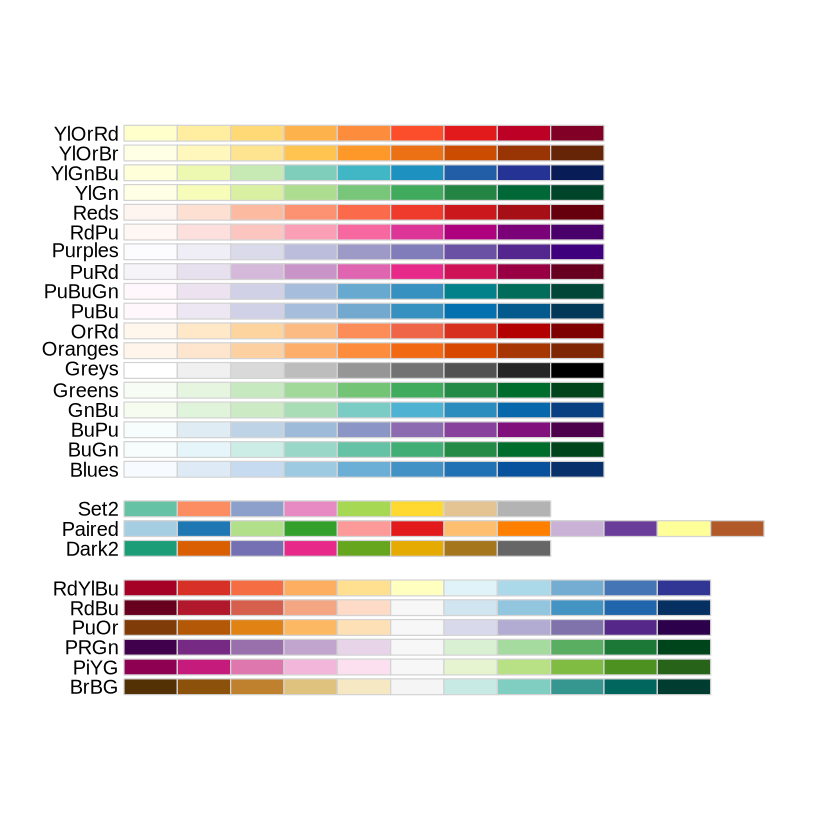

In [6]:
display.brewer.all(colorblindFriendly = TRUE)

I will be using the "Dark2" pallette above for any plots that have the option to add colour. 

A bar graph will be used to compare the subscription status propotions for different experience levels because both are categorical variables.

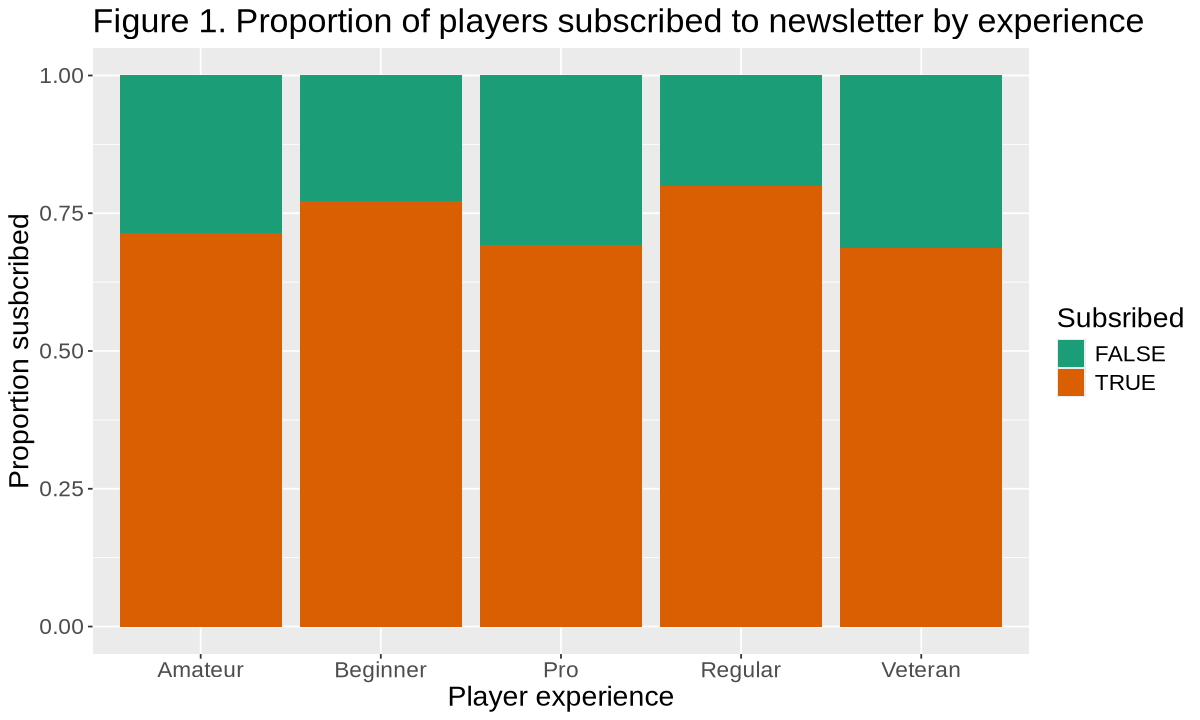

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)
exp_n_sub_plot <- combined_data |>
    ggplot(aes(x = experience, fill = subscribe)) + 
    geom_bar(position = 'fill') + 
    xlab("Player experience") +
    ylab("Proportion susbcribed") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 1. Proportion of players subscribed to newsletter by experience") +
    theme(text = element_text(size = 17)) +
    scale_fill_brewer(palette = 'Dark2')
exp_n_sub_plot

For comparing the number of sessions played for subscribers and nonsubscribers, we can use a boxplot to see if there appears to be any difference in mean since we are plotting a categorical varible with a numeric variable.

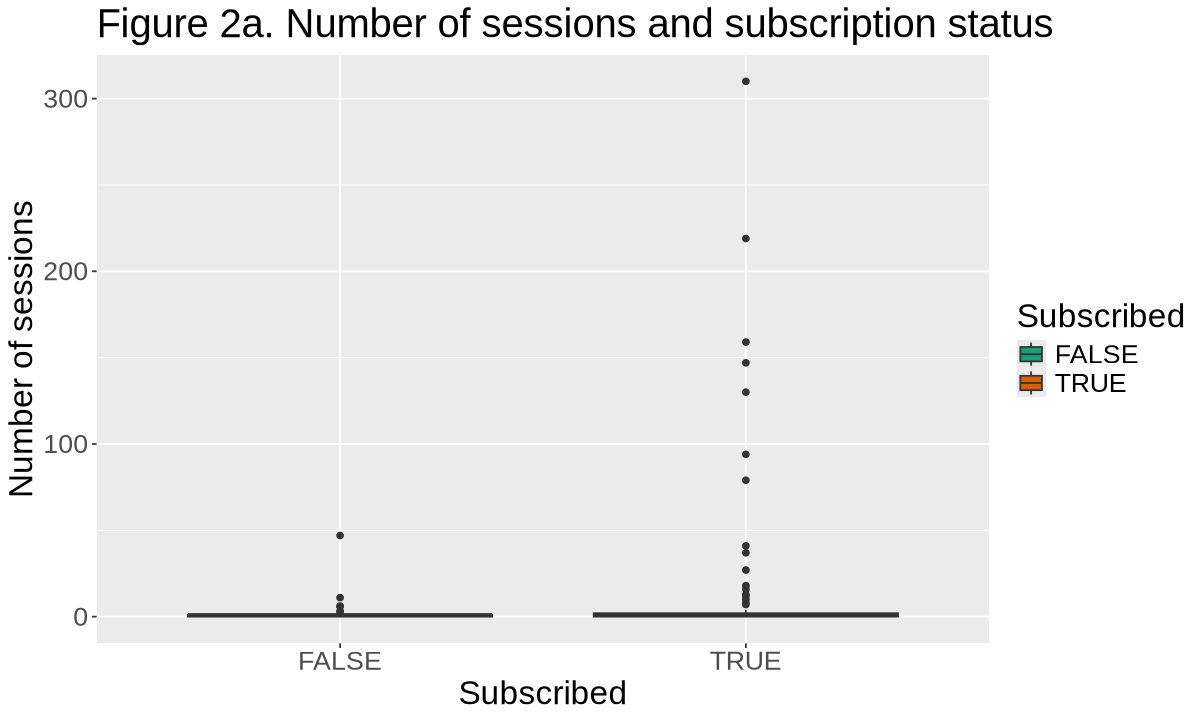

In [8]:
options(repr.plot.width = 10, repr.plot.height = 6)
sessions_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = number_of_sessions, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Number of sessions") +
    labs(fill = "Subscribed") +
    ggtitle("Figure 2a. Number of sessions and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
sessions_n_sub_plot

The above boxplot is hard to read because there are many outliers and the vast majority of players only played for 1 session as can be seen below with the median. We should scale the number of sessions by taking the log and also limit the y-axis to see the differences better.

Warning message:
“Removed 89 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


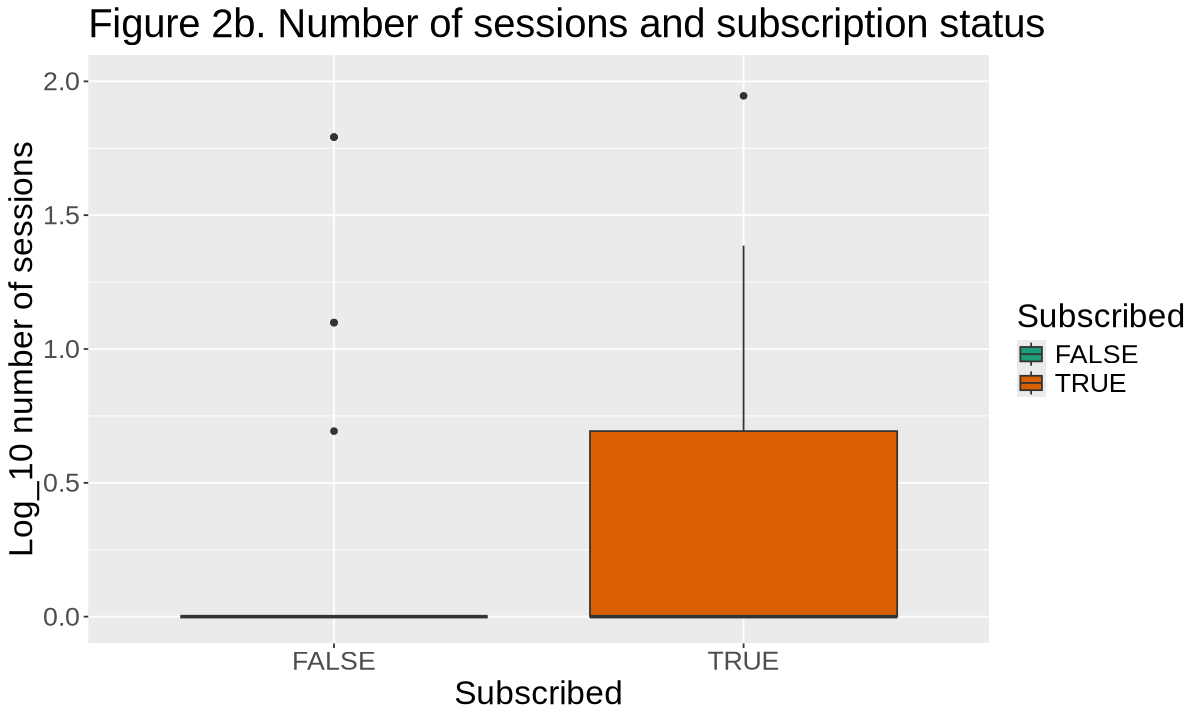

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)
log_sessions_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = log(number_of_sessions), fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Log_10 number of sessions") +
    labs(fill = "Subscribed") +
    ggtitle("Figure 2b. Number of sessions and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2') +
    ylim(c(0,2))
log_sessions_n_sub_plot

We can do the same type of visualisation for hours played as we are dealing with the same type of variables again.

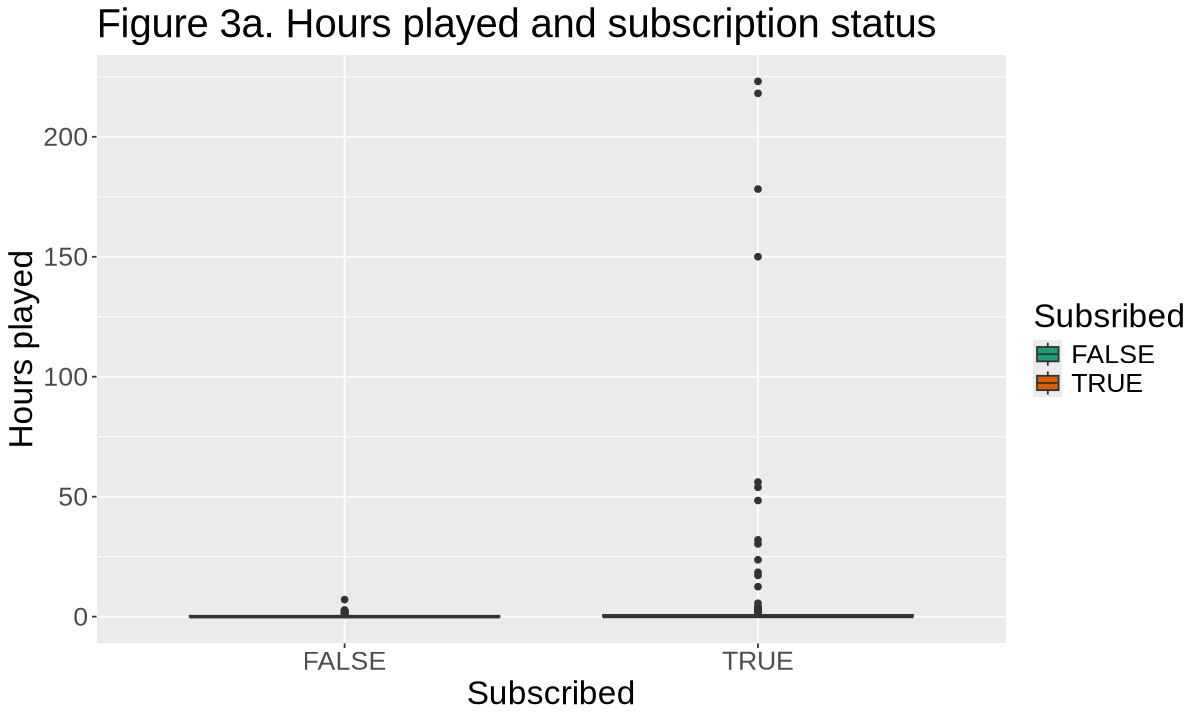

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
hours_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Hours played") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 3a. Hours played and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
hours_n_sub_plot

We are encountering the same problem as we did with the number of sessions played and can solve it the same way as before.

Warning message:
“Removed 152 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


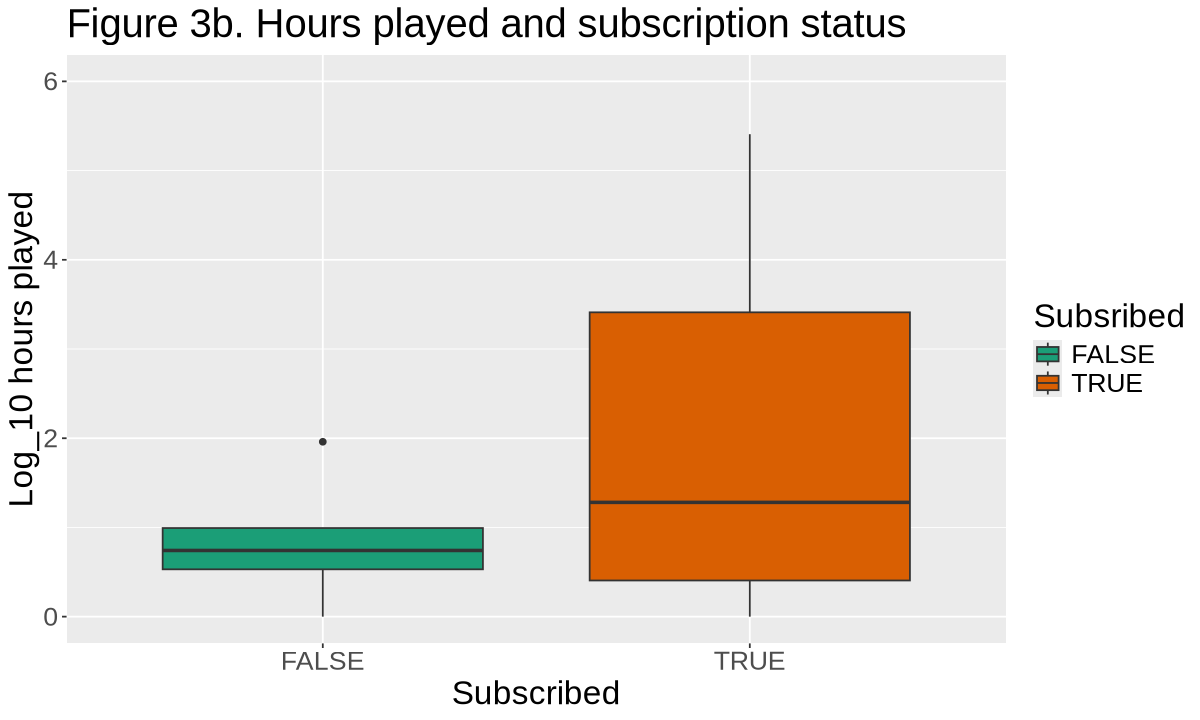

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)
log_hours_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = log(played_hours), fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Log_10 hours played") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 3b. Hours played and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2') +
    ylim(c(0, 6))
log_hours_n_sub_plot

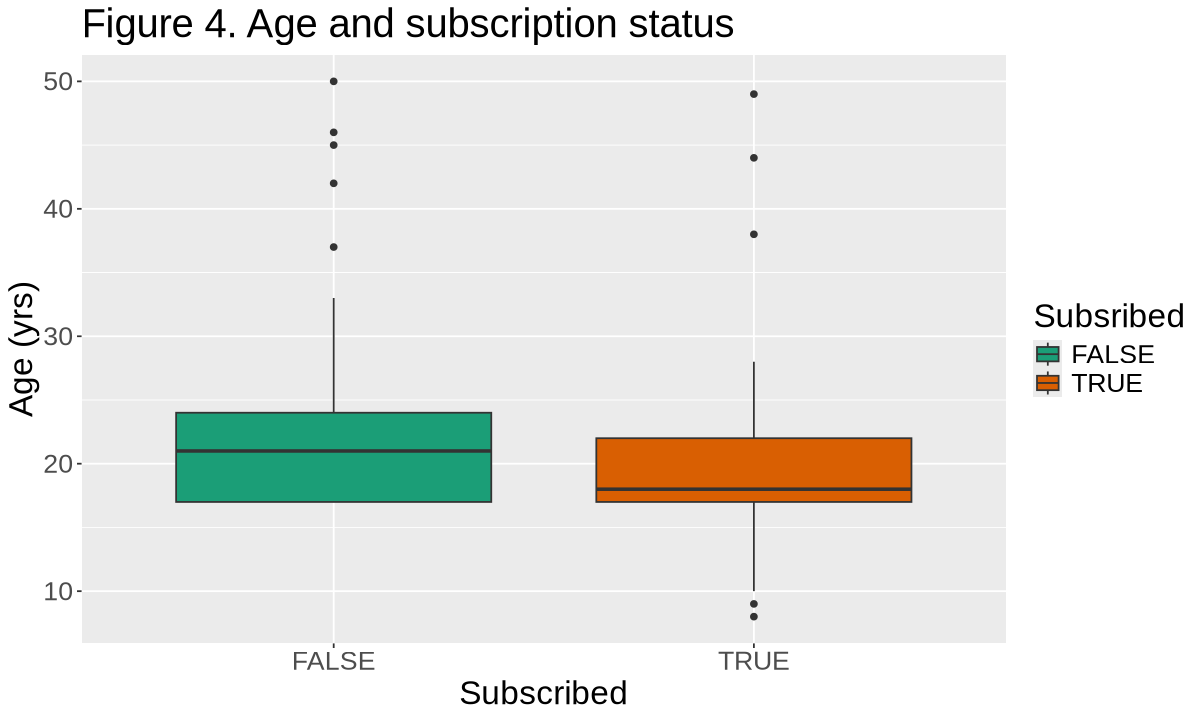

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6)
age_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = age, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Age (yrs)") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 4. Age and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
age_n_sub_plot

<code style="background:yellow;color:black">Based on the bar plot and box plots above, we can assume that player experience is not a good predictor of subscription and that the other variables will need to be scaled (and centered).</code>

We can also compare the numeric variables to each other in terms of grouping. Looking at the plot **below**, it appears that those who subscribed to the newsletter appear to be younger, play for more sessions, and for longer amounts of time.

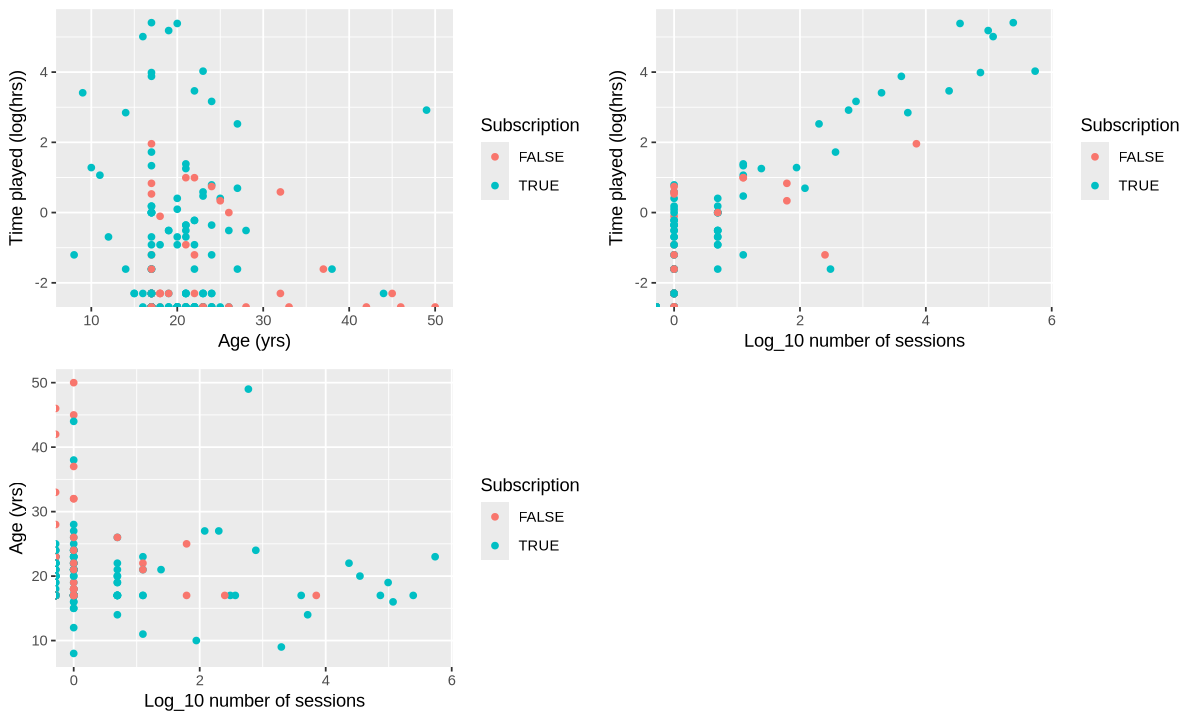

In [13]:
age_n_hrs <- combined_data |>
    ggplot(aes(x = age, y = log(played_hours), colour = subscribe)) +
    geom_point() +
    labs(x = "Age (yrs)", y = "Time played (log(hrs))", colour = "Subscription") +
    scale_fill_brewer(palette = 'Dark2')
sessions_n_hrs <- combined_data |>
    ggplot(aes(x = log(number_of_sessions), y = log(played_hours), colour = subscribe)) +
    geom_point() +
    labs(x = "Log_10 number of sessions", y = "Time played (log(hrs))", colour = "Subscription") +
    scale_fill_brewer(palette = 'Dark2')
sessions_n_age <- combined_data |>
    ggplot(aes(x = log(number_of_sessions), y = age, colour = subscribe)) +
    geom_point() +
    labs(x = "Log_10 number of sessions", y = "Age (yrs)",colour = "Subscription") +
    scale_fill_brewer(palette = 'Dark2')
plot_grid(age_n_hrs, sessions_n_hrs, sessions_n_age)

**Figure 5.** Comparison of numeric variables to each other and coloured by grouping. *(above)*

#### Data Analysis
Now that we have a some understanding of how each variable we chose relates to whether or not a player is subscribed to the newsletter, we can move on to analysing the data. 

We will be creating a K-nearest neighbours model with our selected predictors because we are dealing with a classification problem. *Experience will be excluded from the model because it is a poor predictor and not numeric.* There are ways to incorporate it, but it is beyond the scope of what is taught in this course. The first step is to split our data into a training and testing set. We must also remember to set a seed so that the random number generator starts at the same point throughout so our result does not change.

In [14]:
set.seed(888)
mc <- combined_data |>
    select(subscribe, played_hours, age, number_of_sessions)
mc_split <- initial_split(mc, prop = 0.75, strata = subscribe)  
mc_train <- training(mc_split)   
mc_test <- testing(mc_split)

The next step will be to create a recipe (remembering to scale and center) and a model to find the most appropriate value of k, or in other words, tuning.

In [15]:
set.seed(888)
mc_recipe <- recipe(subscribe ~ number_of_sessions + played_hours + age, data = mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
mc_tune_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

Now we also want to make several folds for cross-validation to help estimate the accuracy of our model. We also want to make a grid of possible k-values for our model.

In [16]:
set.seed(888)
mc_vfold <- vfold_cv(mc_train, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

The next step is to put everything into a workflow and collect the metrics for cross validation.

In [17]:
set.seed(888)
knn_results <- workflow() |>
       add_recipe(mc_recipe) |>
       add_model(mc_tune_model) |>
       tune_grid(resamples = mc_vfold, grid = k_vals) |>
       collect_metrics()

To decide which value of k we want to use in our model, we need to visualise the results by plotting accuracy against k (number of neighbours). It is also possible to find the best k without visualising (also included below).

[1] 13

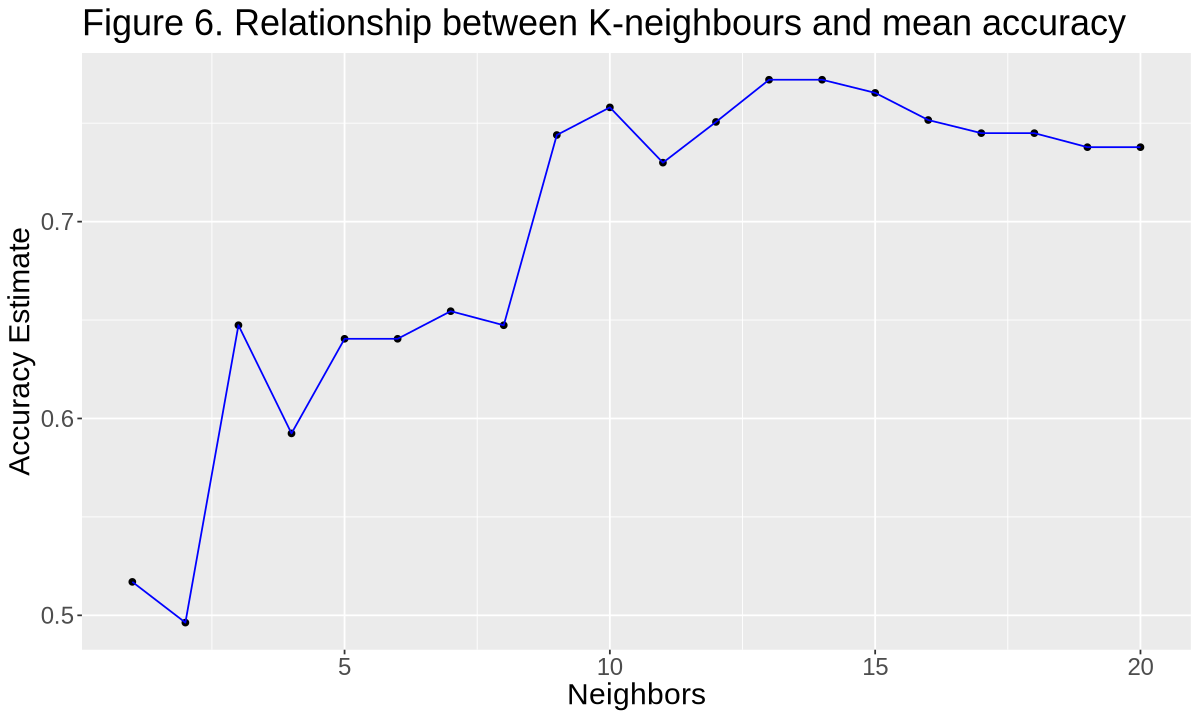

In [18]:
cross_val <- knn_results |>
    filter(.metric == "accuracy")
cross_val_plot <- cross_val |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line(colour = "blue") +
    labs(title = "Figure 6. Relationship between K-neighbours and mean accuracy", x = "Neighbors",
         y = "Accuracy Estimate") +
    theme(text = element_text(size = 18))
cross_val_plot

best_k <- cross_val |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

I will be choosing to use k = 13 for our model because that is where the peak in accuracy is. Any further increase begins to decrease slightly and plateau.

In [19]:
set.seed(888) 
mc_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
       set_engine("kknn") |>
       set_mode("classification")
mc_fit <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(mc_model) |>
  fit(data = mc)

With the model created, we can test it using the testing set we made earlier.

In [20]:
set.seed(888)
mc_test_predictions <- predict(mc_fit, mc_test) |>
  bind_cols(mc_test)
mc_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


## Discussion

From the data visualisation (Fig. 1) and analysis we found that player experience was a poor predictor of subscription to the game-related newsletter. This was not what I expected; however, this was not that relevant to our analysis anyways because we only used the numerical variables to build our K nearest neighbours model.

We also found a difference in means in hours played, number of sessions played, and age between players who were subscribed to the newsletter and those who were not (Fig. 2b, Fig. 3b, Fig. 4). In particular, those who were subscribed to the newsletter tended to play more sessions, play for longer, and were often younger.

In terms of how these numeric variables interacted with each other, we see a weak relationship between time played and age and between number of sessions and age (Fig. 5). From the same figure we can also assume a moderate relationship between number of sessions and time played. The colouring based on subscription status in the figure also confirms what we found in the previous figures which is that younger players who played more sessions and for longer were on average more likely to be subscribed.

Based on the accuracy of the numeric variables in the datasets were good predictors of whether or not a player was subscribed to the newsletter, but not as powerful as expected, given that the accuracy was 0.7346939. The accuracy I expected was a bit higher since the estimated accuracy using the training set was just below 0.8 (Fig. 6), but the accuracy we got was not too far off so it seems reasonable.

The impact of these findings is that at the very least, we know that advertising within this game-related newsletter is a viable option for finding participants since subscribers were more likely to play more often and for longer.

A future questions this could lead is if there are better ways to predict subscription status. Another question is if we apply the methods we used here to see if we can predict membership within gaming-related school clubs based on the same variables. If possible we could find which clubs would be good to advertise the study to based on hours of games played.

## References

*Data Science: A First Introduction*, https://datasciencebook.ca/.